# Part 2: Feature Engineering and Model Selection

In [1]:
# Required libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import string
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the cleaned_dataset:
df = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Project-7_NLP\Data\cleaned_twitter_disaster.csv')

In [3]:
df.head(5)

,id,keyword,location,text,target,text_length,cleaned_text,word_length,mention_count,hashtag_count,question_count,exclamation_count,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,Our Deeds are the Reason of this earthquake Ma...,13,0,1,70,0,"['Our', 'Deeds', 'are', 'the', 'Reason', 'of',..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,Forest fire near La Ronge Sask Canada,7,0,0,39,0,"['Forest', 'fire', 'near', 'La', 'Ronge', 'Sas..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,All residents asked to shelter in place are be...,22,0,0,134,0,"['All', 'residents', 'asked', 'to', 'shelter',..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,13000 people receive wildfires evacuation orde...,8,0,1,66,0,"['13000', 'people', 'receive', 'wildfires', 'e..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,Just got sent this photo from Ruby Alaska as s...,16,0,2,89,0,"['Just', 'got', 'sent', 'this', 'photo', 'from..."


In [4]:
df.shape

(7613, 13)

In [5]:
print(df.keys())

Index(['id', 'keyword', 'location', 'text', 'target', 'text_length',
       'cleaned_text', 'word_length', 'mention_count', 'hashtag_count',
       'question_count', 'exclamation_count', 'tokens'],
      dtype='object')


In [6]:
# Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 7613 non-null   int64 
 1   keyword            7552 non-null   object
 2   location           5080 non-null   object
 3   text               7613 non-null   object
 4   target             7613 non-null   int64 
 5   text_length        7613 non-null   int64 
 6   cleaned_text       7613 non-null   object
 7   word_length        7613 non-null   int64 
 8   mention_count      7613 non-null   int64 
 9   hashtag_count      7613 non-null   int64 
 10  question_count     7613 non-null   int64 
 11  exclamation_count  7613 non-null   int64 
 12  tokens             7613 non-null   object
dtypes: int64(8), object(5)
memory usage: 773.3+ KB


In [7]:
df.describe()

,id,target,text_length,word_length,mention_count,hashtag_count,question_count,exclamation_count
count,7613.000000,7613.00000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,5441.934848,0.42966,101.037436,14.903586,0.362406,0.446999,102.037436,0.154079
std,3137.116090,0.49506,33.781325,5.732604,0.720097,1.099841,33.781325,0.619387
min,1.000000,0.00000,7.000000,1.000000,0.000000,0.000000,8.000000,0.000000
25%,2734.000000,0.00000,78.000000,11.000000,0.000000,0.000000,79.000000,0.000000
50%,5408.000000,0.00000,107.000000,15.000000,0.000000,0.000000,108.000000,0.000000
75%,8146.000000,1.00000,133.000000,19.000000,1.000000,0.000000,134.000000,0.000000
max,10873.000000,1.00000,157.000000,31.000000,8.000000,13.000000,158.000000,12.000000


# Task: Feature Engineering

In [8]:
# Extracting the relevant features:

# Extract the word frequency features
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned_text to get the word frequency matrix
X = vectorizer.fit_transform(df['cleaned_text'])


# Extract the  TF-IDF scores features
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned_text to get the TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])


In [9]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 97578 stored elements and shape (7613, 18075)>

In [10]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 97578 stored elements and shape (7613, 18075)>

## Sentiments Analysis

In [11]:
# Extract the sentiment analysis features
from textblob import TextBlob
cleaned_text=df['cleaned_text']

# Function to perform sentiment analysis
def get_sentiment(cleaned_text):
    blob = TextBlob(cleaned_text)
    
    # Sentiment polarity (-1 to 1)
    polarity = blob.sentiment.polarity
    
    # Subjectivity (0 to 1)
    subjectivity = blob.sentiment.subjectivity
    
    return polarity, subjectivity

# Apply sentiment analysis to each text
sentiments = [get_sentiment(cleaned_text) for cleaned_text in cleaned_text]

# Convert results to a DataFrame
sentiment_df = pd.DataFrame(sentiments, columns=['Polarity', 'Subjectivity'])

In [12]:
sentiment_df

,Polarity,Subjectivity
0,0.000000,0.000000
1,0.100000,0.400000
2,-0.018750,0.387500
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
7608,0.000000,1.000000
7609,0.150000,0.350000
7610,0.000000,0.000000
7611,-0.260417,0.583333


## Word Embeddings using GloVe

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus and the resulting representations showcase interesting linear substructures of the word vector space.

In [13]:
df1= df[['text', 'cleaned_text']]
df1

,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...
1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...,aria_ahrary TheTawniest The out of control wil...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,M194 0104 UTC5km S of Volcano Hawaii
7611,Police investigating after an e-bike collided ...,Police investigating after an ebike collided w...


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])

word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

18126

In [16]:
max(len(data) for data in df['cleaned_text'])

143

In [17]:
# Padding cleaned_text data
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
padded_seq = pad_sequences(sequences, maxlen=131, padding='post', truncating='post')

In [18]:
padded_seq[0]

array([ 107, 4528,   21,    1,  837,    5,   18,  241,  123, 1578, 4529,
         67,   38,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [19]:
# create embedding index
embedding_index = {}

# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [20]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
embedding_matrix.shape

(18127, 100)

## Additional Features: Hashtags, Mentions etc.

In [22]:
# Function to calculate additional features
def extract_additional_features(text):
    num_hashtags = len(re.findall(r"#\w+", text))
    num_mentions = len(re.findall(r"@\w+", text))
    num_exclamations = len(re.findall(r"!\w+", text))
    return pd.Series([num_hashtags, num_mentions, num_exclamations], index=['num_hashtags', 'num_mentions', 'num_exclamations'])

In [23]:
# Apply function to both training and test sets
additional_future = df['text'].apply(extract_additional_features)
additional_future

,num_hashtags,num_mentions,num_exclamations
0,1,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,2,0,0
...,...,...,...
7608,0,0,0
7609,0,2,0
7610,0,0,0
7611,0,0,0


## Split the dataset

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
X = df['cleaned_text']  
y = df['target'] 

In [26]:
# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Use the 5000 most frequent words
X_tfidf = vectorizer.fit_transform(X)

print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (7613, 5000)


In [27]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (6090, 5000)
Testing data size: (1523, 5000)


# Task: Model Selection and Training

## Logistic Regression Model

In [28]:
# Create a Logistic Regression classifier
logreg = LogisticRegression(solver='liblinear')


# Train the model using the training data
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [29]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10108 stored elements and shape (1523, 5000)>

In [30]:
y_test

2644    1
2227    0
5448    1
132     0
6845    0
       ..
1835    0
506     1
3592    1
6740    1
1634    0
Name: target, Length: 1523, dtype: int64

In [31]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40540 stored elements and shape (6090, 5000)>

In [32]:
y_train

4996    1
3263    0
4907    1
2855    1
4716    0
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 6090, dtype: int64

In [33]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

In [34]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7997

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523


Confusion Matrix:
 [[779  95]
 [210 439]]


## Random Forest Classifier Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
random_model = RandomForestClassifier()
random_model.fit(X_train, y_train)
y_pred_ran = random_model.predict(X_test)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
print(classification_report(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       874
           1       0.76      0.68      0.72       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



In [37]:
rf

RandomForestClassifier(random_state=42)

## Neural Network Model

In [38]:
# Importing some important features
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [39]:
# Create NN_Model
model = Sequential()
model.add(Dense(128, input_dim=X_tfidf.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (0 or 1)
    
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
# Wrap the Keras model into a scikit-learn compatible classifier
nn_model  = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5878 - loss: 0.6638
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8413 - loss: 0.4015
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8875 - loss: 0.2859
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9193 - loss: 0.2110
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9394 - loss: 0.1795
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9541 - loss: 0.1361
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9592 - loss: 0.1201
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9698 - loss: 0.0935
Epoch 9/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9685 - loss: 0.0863
Epoch 10/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9713 - loss: 0.0829


In [40]:
# Evaluate the model test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7279 - loss: 1.0487
Test accuracy: 0.76


In [41]:
nn_model

# Cross-validation Technique

In [42]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
import xgboost as xgb
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

# Load the cleaned_dataset:
df = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Project-7_NLP\Data\cleaned_twitter_disaster.csv')

# Downloading NLTK stopwords for text preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


# Checking if there's any null values and filling them
df.dropna(subset=['text', 'target'], inplace=True)

# Shuffle the dataset to ensure randomness for cross-validation
df = shuffle(df, random_state=42)

# 2. Preprocessing Function for Text
def preprocess_text(text):
    """
    Function to clean and preprocess the text data.
    - Convert to lowercase
    - Remove punctuation and non-alphanumeric characters
    - Remove stopwords
    """
    text = text.lower()
    text = ''.join([char if char.isalnum() or char.isspace() else ' ' for char in text])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to all tweets
df['processed_text'] = df['text'].apply(preprocess_text)

# Feature Extraction using TF-IDF
X = df['processed_text'] 
y = df['target']  

#Set up Cross-validation using StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Logistic Regression model
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(solver='liblinear', random_state=42))

# Cross-validation with accuracy as scoring metric
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

# Output the cross-validation results
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cross-validation Accuracy Scores: [0.79658793 0.79790026 0.79527559 0.78449409 0.81208936 0.80289093
 0.79894875 0.79632063 0.78843627 0.77792378]
Mean Accuracy: 0.7950867590302855


# Optimize Hyperparameter Tuning Using Grid Search

In [43]:
# Logistic Regression Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
logistic_model = LogisticRegression()
# Set up the parameter grid for Grid Search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'C': [0.01, 0.1, 1, 10, 100],                  
    'solver': ['liblinear', 'saga'],               
    'max_iter': [100, 200, 500]                    
}
# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [44]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [45]:
# Get the best model after tuning
best_logistic_model = grid_search.best_estimator_

In [46]:
# Make predictions with the best model
y_pred_log = best_logistic_model.predict(X_test)

In [47]:
# Print classification report
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred_log))

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [48]:
# Random Forest Hyperparameter Tuning

# Define the model
random_model = RandomForestClassifier(random_state=42)
# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],               
    'max_depth': [None, 10, 20, 30],             
    'min_samples_split': [2, 5, 10],              
    'min_samples_leaf': [1, 2, 4],                
    'max_features': ['sqrt', 'log2'],           
    'bootstrap': [True, False]                  
}
# Set up GridSearchCV with cross-validation
grid_search_ran = GridSearchCV(random_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [49]:
# Fit the grid search to the data
grid_search_ran.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [50]:
# Get the best model after tuning
best_random_model = grid_search_ran.best_estimator_

In [51]:
# Make predictions with the best model
y_pred_ran = best_random_model.predict(X_test)

In [52]:
# Print classification report
print("Best Parameters:", grid_search_ran.best_params_)
print(classification_report(y_test, y_pred_ran))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.79      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



In [53]:
# Neural Network model Hyperparameter Tuning

def create_model():
    model_neural_tue = Sequential()
    model_neural_tue.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model_neural_tue.add(Dense(1))  # Single output for regression
    model_neural_tue.compile(optimizer='adam', loss='mse')
    return model_neural_tue

In [54]:
from scikeras.wrappers import KerasRegressor
model_neural_tue = KerasRegressor(model=create_model, epochs=10, batch_size=10, verbose=0)
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [10, 20, 50]
}

In [55]:
# Initialize RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_neural_tue, param_distributions=param_grid, n_iter=10, error_score='raise')

In [56]:
# Perform the random search
random_result = random_search.fit(X_train, y_train)

In [57]:
accuracy = random_result.score(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.2032


# Part 3: Model Evaluation and Validation

**Model Evaluation** and **Model Validation** are critical steps to ensure that a trained model generalizes well to new, unseen data and that it performs accurately and reliably. While both terms are sometimes used interchangeably, they have distinct meanings and roles in the machine learning techniques.

### Calculate the accuracy, precision, recall, and F1-score by using Binary classification

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Create a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model (Random Forest classifier in this case)
random_model = RandomForestClassifier(random_state=42)
random_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.86
Precision: 0.89
Recall: 0.83
F1-Score: 0.86


#  Visualization Performance

## Confusion-matrices

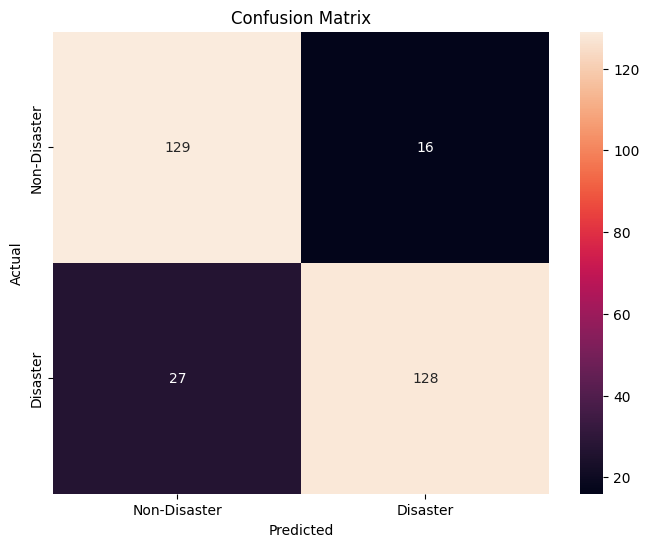

In [59]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
            
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ROC-Curve

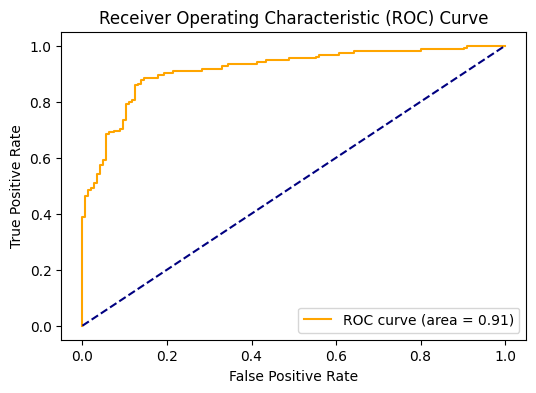

In [60]:
from sklearn.metrics import roc_curve, auc

# Train a classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get predicted probabilities
y_prob = logreg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange',  label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal lin
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc= 'lower right')
plt.show()

## Precision-recall Curve

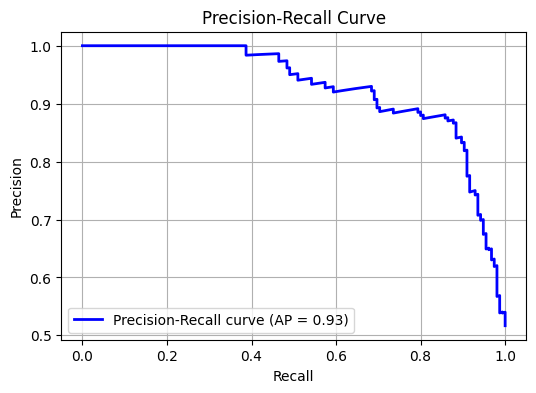

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## Saving the Best Model

In [62]:
import pickle

pickle.dump(best_logistic_model, open('regression_model.pkl', 'wb'))

# Check the type of the model 
print(type(best_logistic_model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
